In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
nameCSV = 'hydro_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 1856


In [4]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

2.2381179332733154 1985-04-09 08:40:00.762408
2.335000276565552 1985-05-02 10:19:42.794643
1.6103999614715576 1985-05-05 10:28:31.310936
2.806500196456909 1985-05-28 12:08:08.132813
1.6183530092239382 1985-06-26 03:00:05.350414
0.43242108821868896 1985-08-08 17:15:39.942435
1.225307822227478 1985-09-23 20:34:46.584136
1.1935999393463137 1985-11-12 00:02:04.968699
0.4020000398159027 1985-11-14 13:05:19.043750
0.2772000133991241 1985-12-10 14:53:17.146876
1.3723334074020386 1986-01-20 04:59:25.847330
1.9206666946411133 1986-01-23 05:08:08.691408
0.5419999957084656 1986-02-12 06:38:26.406249
0.54666668176651 1986-02-15 06:47:09.250327
2.8298890590667725 1986-04-02 10:05:05.468750
1.30566668510437 1986-05-18 13:22:42.188367
1.4013333320617676 1986-06-10 15:01:19.719617
0.8573750257492065 1986-07-03 16:39:51.374022
1.4612727165222168 1986-09-10 21:35:17.028408
0.4185000061988831 1986-09-16 10:47:24.924219
0.467600017786026 1986-11-13 02:02:23.975000
1.2897223234176636 1986-11-30 03:15:04.79

3.7062499523162837 2005-07-20 03:56:31.376953
2.235153913497925 2005-07-24 19:39:41.924278
1.841499924659729 2005-07-27 08:41:46.330728
2.4670000076293945 2005-07-30 01:55:02.011718
1.8428000211715696 2005-08-07 23:46:50.733334
1.9731251001358032 2005-08-08 12:11:00.652343
1.4699413776397705 2005-08-10 20:52:29.447610
1.899769306182861 2005-08-13 09:54:35.015025
2.335750102996826 2005-08-18 21:52:05.648438
2.3607335090637207 2005-08-24 12:08:08.081250
2.693333387374878 2005-08-27 22:05:26.968749
2.1512498855590816 2005-08-28 19:50:37.070312
1.8258001804351809 2005-08-30 11:07:26.058334
1.7820000648498535 2005-09-07 17:49:08.839845
0.5213999748229979 2005-09-11 23:46:49.435938
0.5094166994094849 2005-09-12 12:10:58.923178
0.5610000491142273 2005-09-13 23:18:01.765620
1.0013846158981323 2005-09-16 12:20:15.046274
0.8223999738693237 2005-09-17 15:47:41.471874
1.0705000162124634 2005-09-27 13:46:13.542967
1.289800047874451 2005-09-28 12:08:08.082813
1.1703529357910156 2005-10-01 00:30:56.8

0.8821500778198242 2014-12-29 08:51:11.873437
1.9266666836208768 2015-01-04 06:10:43.070313
2.0622380574544272 2015-01-08 06:49:44.070684
2.4886472365435437 2015-01-09 17:49:12.037683
0.9296112060546876 2015-01-18 04:48:16.064918
1.0405000686645507 2015-01-28 02:46:47.928710
1.3715556462605794 2015-01-31 04:48:09.348307
0.9137143407549176 2015-02-02 04:45:38.657367
2.19894750494706 2015-02-06 22:04:22.678455
2.6026004791259765 2015-02-07 00:45:19.412892
2.346952529180617 2015-02-16 22:43:50.281250
1.4020477476574125 2015-02-26 20:42:20.934524
0.65625 2015-03-01 03:23:12.299805
0.3101249933242798 2015-03-06 15:01:47.596507
1.1380000114440918 2015-03-08 18:40:52.322656
1.7854999542236327 2015-03-18 16:39:24.967968
1.7888500213623046 2015-03-28 14:37:57.088282
0.7446111573113335 2015-04-04 13:36:46.189236
0.5504737151296515 2015-04-07 12:36:29.709376
2.689550018310547 2015-04-17 10:35:01.235547
0.5096667077806261 2015-04-26 00:35:42.813422
1.3731000900268555 2015-04-27 08:33:32.357422
1.2

In [5]:
jan = []
feb = []
mar = []
apr = []
may = []
jun = []
jul = []
aug = []
sep = []
octo = []
nov = []
dec = []

for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        jan.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 2:
        feb.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 3:
        mar.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 4:
        apr.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 5:
        may.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 6:
        jun.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 7:
        jul.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 8:
        aug.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 9:
        sep.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 10:
        octo.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 11:
        nov.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 12:
        dec.append(np.mean(wh[days[k]:days[k+1]]))

In [6]:
len(jan)+len(feb)+len(mar)+len(apr)+len(may)+len(jun)+len(jul)+len(aug)+len(sep)+len(octo)+len(nov)+len(dec)

1855

In [7]:
overall = [
np.mean(jan),
np.mean(feb),
np.mean(mar),
np.mean(apr),
np.mean(may),
np.mean(jun),
np.mean(jul),
np.mean(aug),
np.mean(sep),
np.mean(octo),
np.mean(nov),
np.mean(dec)]


label = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec']

stdev = [
np.std(jan),
np.std(feb),
np.std(mar),
np.std(apr),
np.std(may),
np.std(jun),
np.std(jul),
np.std(aug),
np.std(sep),
np.std(octo),
np.std(nov),
np.std(dec)]

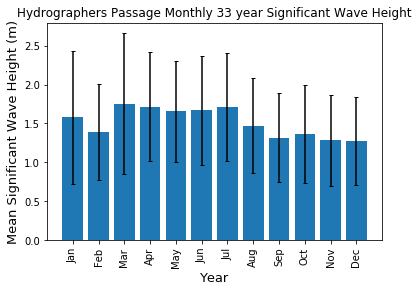

In [8]:
index = np.arange(len(label))
plt.bar(index, overall, yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Hydrographers Passage Monthly 33 year Significant Wave Height')
plt.savefig('Hydrographers Passage Monthly 33 year Significant Wave Height')
plt.show()